In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from collections import Counter



In [41]:
df = pd.read_pickle('dataset_sentimens.pckl')
# df = df[df.neun_euro_context]

In [42]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    'positive', 
                    'negative', 
                    'neutral']

In [43]:
X = df[cluster_variables].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
distortions_euclidean = []
distortions_minkowski = []
distortions_cityblock = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'minkowski'), axis=1)) / X.shape[0])
    distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'cityblock'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [6]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 1.8601388888784414
2 : 1.3367302898334288
3 : 1.2715760202483093
4 : 1.0841540769370561
5 : 0.9875472940583837
6 : 0.9533493104705701
7 : 0.9179527784164956
8 : 0.8586349498151704
9 : 0.7892366803167745


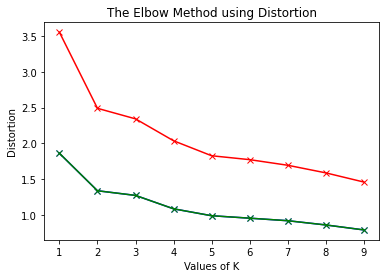

In [7]:
plt.plot(K, distortions_euclidean, 'bx-')
plt.plot(K, distortions_minkowski, 'gx-')
plt.plot(K, distortions_cityblock, 'rx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [8]:
for key, val in mapping2.items():
   print(f'{key} : {val}')

1 : 2430.0000000000027
2 : 1800.131785753107
3 : 1262.7890463101269
4 : 937.6027151508315
5 : 725.1812368149036
6 : 588.6921891806517
7 : 520.3595489453555
8 : 457.55952804044256
9 : 409.04235944540966


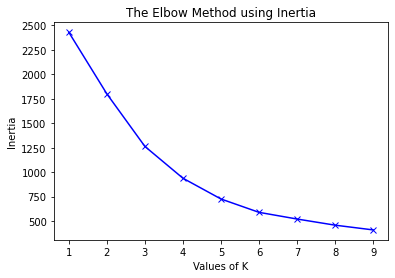

In [9]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_

/home/egon/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [17]:
np.bincount(kmeans.labels_)

array([ 18, 212,   1,  22, 152])

In [18]:
df['kmeans_label'] = kmeans.labels_

In [19]:
df['neun_euro_context'] = df['neun_euro_context']
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3,4
index,11691.555556,11504.476415,9087.000000,11769.818182,11989.572368
public_metrics.retweet_count,4.888889,0.250000,44.000000,0.000000,0.151316
public_metrics.reply_count,6.555556,0.584906,4.000000,0.636364,0.500000
public_metrics.like_count,45.000000,3.382075,319.000000,1.818182,2.526316
public_metrics.quote_count,1.000000,0.037736,8.000000,0.000000,0.026316
is_retweet,0.000000,0.000000,0.000000,0.000000,0.000000
neun_euro_context,True,True,True,True,True
positive,-2.062548,-2.011561,-2.076343,2.648290,-1.688485
negative,0.870645,-0.565649,2.263094,-0.561379,2.869377
neutral,2.178979,3.739079,0.844158,-2.015133,-0.974534


In [21]:
df_tmp = pd.DataFrame()
df_tmp['hastag_list'] = df[df.kmeans_label == 3].text.str.findall(r'#.*?(?=\s|$)')
df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
df_tmp = df_tmp[df_tmp.number_hastags != 3]
hashtags = list()
for i, row in df_tmp.iterrows():
    hashtags += row['hastag_list']
hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
{k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)}


{'9EuroTicket': 8,
 'NeunEuroTicket': 1,
 'PfingstenBahnFahrrad': 1,
 '9€Ticket': 1,
 'Luxusprobleme': 1,
 'Hamburg': 1,
 'ÖPNV': 1}

In [15]:
a = {'9EuroTicket': 41,
 'Fahrrad': 39,
 'Bahn': 21,
 'ÖPNV': 20,
 'Verkehrswende': 13,
 'Blaulicht': 9,
 'Zugunglück': 8,
 'Zug': 8,
 'oepnv': 7,
 'Unfall': 7,
 'Radfahrerin': 7,
 'Bahnübergang': 7,
 'Weingarten': 7}

In [37]:
df[df.kmeans_label==3].to_csv('output.csv')


SyntaxError: invalid syntax (<ipython-input-37-b97f92f97fb6>, line 2)

In [44]:
df['neun_euro_context_n'] = pd.np.where(df['neun_euro_context'],1,0) 

<ipython-input-44-f93166582bd6>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['neun_euro_context_n'] = pd.np.where(df['neun_euro_context'],1,0)


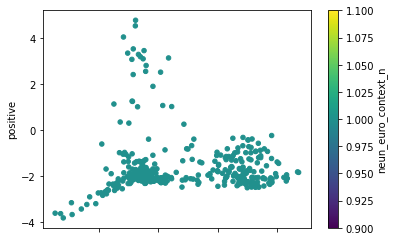

In [46]:
ax2 = df[df.neun_euro_context_n ==1].plot.scatter(x='negative',
                      y='positive', c='neun_euro_context_n',

                      colormap='viridis')


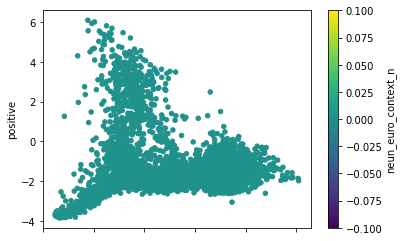

In [48]:
ax2 = df[df.neun_euro_context_n ==0].plot.scatter(x='negative',
                      y='positive', c='neun_euro_context_n',

                      colormap='viridis')

<AxesSubplot:xlabel='negative', ylabel='positive'>

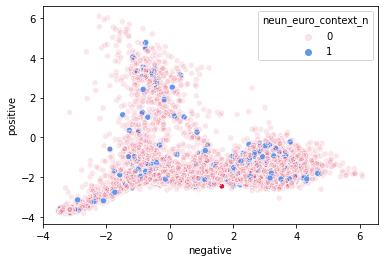

In [58]:
import seaborn as sns
from matplotlib.colors import to_rgba
sns.scatterplot(data=df, x="negative", y="positive", hue="neun_euro_context_n", palette={1: to_rgba('cornflowerblue', 1),
              0: to_rgba('crimson', 0.1)})
# , style="time"
